<a href="https://colab.research.google.com/github/manashpratim/Flower_Recognition/blob/master/Flower_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
      "https://storage.googleapis.com/kaggle-datasets/8782/44566/flowers.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1560954890&Signature=C4S68yCItn46JHtro62IpvAqYJF96tEAScl2VbJ%2BuuUBEIzWtbDHPhkV6qmA%2Bv9y6Dy0eAMW529ZSWvuy12pDnB7Xd2TLXz88ZctDG%2B4nJMnNQh9b97CYB9MtW8teqAPf440wlhyauZ0fYacqGkNU00rpLi6gT6b34glR%2BgQ%2Fb3S4DQMl1Dwwfhc48bY9efReoHGCgl2dEJUHoqGCupz3C9CLfP9t0JrE9UOEVNcNQQ7PZcqDYPQOmHzHuiaUOEk9XZlOVn8B5n67h9Qpj%2FDDOVNXP7fBZd%2FHqi1QfZR84wC6um%2Bb8BSYgMwwtuBzxYtiPAG0A4NveWprCuka2yIwA%3D%3D" \
       -O "/tmp/flowers.zip"

--2019-06-16 17:24:30--  https://storage.googleapis.com/kaggle-datasets/8782/44566/flowers.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1560954890&Signature=C4S68yCItn46JHtro62IpvAqYJF96tEAScl2VbJ%2BuuUBEIzWtbDHPhkV6qmA%2Bv9y6Dy0eAMW529ZSWvuy12pDnB7Xd2TLXz88ZctDG%2B4nJMnNQh9b97CYB9MtW8teqAPf440wlhyauZ0fYacqGkNU00rpLi6gT6b34glR%2BgQ%2Fb3S4DQMl1Dwwfhc48bY9efReoHGCgl2dEJUHoqGCupz3C9CLfP9t0JrE9UOEVNcNQQ7PZcqDYPQOmHzHuiaUOEk9XZlOVn8B5n67h9Qpj%2FDDOVNXP7fBZd%2FHqi1QfZR84wC6um%2Bb8BSYgMwwtuBzxYtiPAG0A4NveWprCuka2yIwA%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.25.80, 2404:6800:4004:809::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.25.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 235781000 (225M) [application/x-zip-compressed]
Saving to: ‘/tmp/flowers.zip’

/tmp/flowers.zip    100%[===================>] 224.86M   134MB/s    in 1.7s    

2019-06-16 17:24:32 (134 MB/s) - ‘/tmp

In [0]:
import os
import zipfile

local_zip='/tmp/flowers.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/flowers')
zip_ref.close()

In [0]:
# Making directories using Python
flowers=['daisy', 'tulip', 'rose', 'sunflower', 'dandelion']

try:
    os.makedirs('/tmp/Flowers/training/')
    os.makedirs('/tmp/Flowers/testing/')
    for flower in flowers:
      os.mkdir('/tmp/Flowers/training/'+flower+'/')
      os.mkdir('/tmp/Flowers/testing/'+flower+'/')
except OSError:
     pass

In [0]:
#Function for Splitting Data
def split_data(SOURCE,TRAINING,TESTING,SPLIT_SIZE):
  files=[]
  
  for filename in os.listdir(SOURCE):
    file=SOURCE+filename
    if os.path.getsize(file)>0:
      files.append(filename)
    else:
      print(filename + ' is zero length. So ignoring!')
      
  train_length =int(len(files)* SPLIT_SIZE)
  test_length =int(len(files)-train_length)
  
  import random
  suffled_set=random.sample(files,len(files))
  
  train_set=suffled_set[0:train_length]
  test_set=suffled_set[train_length:]
  
  from shutil import copyfile
  for filename in train_set:
    copyfile(SOURCE+filename,TRAINING+filename)
    
  for filename in test_set:
    copyfile(SOURCE+filename,TESTING+filename)
    

In [0]:
#Splitting Data
for flower in flowers:
  SOURCE='/tmp/flowers/flowers/'+flower+'/'
  TRAINING='/tmp/Flowers/training/'+flower+'/'
  TESTING='/tmp/Flowers/testing/'+flower+'/'
  SPLIT_SIZE=0.9
  split_data(SOURCE,TRAINING,TESTING,SPLIT_SIZE)
  

In [9]:
for flower in flowers:
  TRAINING='/tmp/Flowers/training/'+flower+'/'
  TESTING='/tmp/Flowers/testing/'+flower+'/'
  print('Total training '+ flower+' images:',len(os.listdir(TRAINING)))
  print('Total testing '+ flower+' images:',len(os.listdir(TESTING)))
  

Total training daisy images: 692
Total testing daisy images: 77
Total training tulip images: 885
Total testing tulip images: 99
Total training rose images: 705
Total testing rose images: 79
Total training sunflower images: 660
Total testing sunflower images: 74
Total training dandelion images: 949
Total testing dandelion images: 106


In [0]:
import tensorflow as tf
from tensorflow import keras

In [11]:
#Image Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
      '/tmp/Flowers/training/',
      target_size=(150,150),
      batch_size=50,
      class_mode='sparse'
)

test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=train_datagen.flow_from_directory(
      '/tmp/Flowers/testing/',
      target_size=(150,150),
      batch_size=10,
      class_mode='sparse'
)

Found 3888 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


In [12]:
#Building a ConvNet

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(5,activation='softmax')
])

W0616 17:37:58.119821 140160154085248 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
model.compile(optimizer='adagrad',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit_generator(
  train_generator,
  epochs=10,
  validation_data=test_generator,
  verbose=1
)

W0616 17:38:30.527910 140160154085248 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/optimizer_v2/adagrad.py:105: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/10
78/78 [==============================] - 18s 228ms/step - loss: 5.5274 - acc: 0.3783 - val_loss: 1.1461 - val_acc: 0.5448
Epoch 2/10
78/78 [==============================] - 13s 163ms/step - loss: 1.1846 - acc: 0.5213 - val_loss: 1.0782 - val_acc: 0.5724
Epoch 3/10
78/78 [==============================] - 13s 161ms/step - loss: 1.0193 - acc: 0.5887 - val_loss: 1.0713 - val_acc: 0.5494
Epoch 4/10
78/78 [==============================] - 12s 157ms/step - loss: 0.9043 - acc: 0.6433 - val_loss: 1.0314 - val_acc: 0.5747
Epoch 5/10
78/78 [==============================] - 12s 156ms/step - loss: 0.8031 - acc: 0.7101 - val_loss: 0.9867 - val_acc: 0.6092
Epoch 6/10
78/78 [==============================] - 12s 156ms/step - loss: 0.7243 - acc: 0.7500 - val_loss: 1.0861 - val_acc: 0.5885
Epoch 7/10
78/78 [==============================] - 12s 158ms/step - loss: 0.6601 - acc: 0.7832 - val_loss: 0.9834 - val_acc: 0.6115
Epoch 8/10
78/78 [==============================] - 12s 156ms/step - 

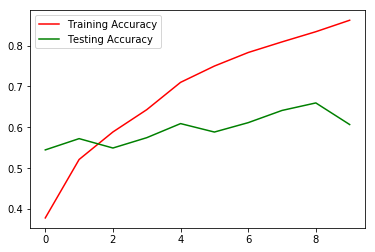

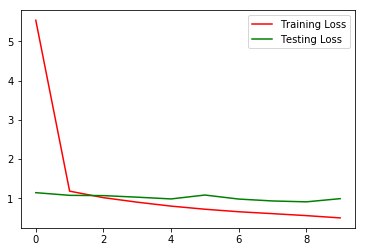

In [15]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

In [0]:
#Clean Up
import os,signal
os.kill(os.getpid(),signal.SIGKILL)

In [0]:
#Removing Non empty directory
import shutil
shutil.rmtree('/tmp/Flowers/')